In [151]:
import pandas as pd

In [152]:
valeur_ajoutee_gen = pd.read_csv('valeur_ajoutee_gen.csv', low_memory = False).dropna(axis=1, how='all')
valeur_ajoutee_pro = pd.read_csv('valeur_ajoutee_pro.csv', low_memory = False).dropna(axis=1, how='all')

In [153]:
ips_1 = pd.read_csv("ips.csv")
ips_2 = pd.read_csv("fr-en-ips_lycees.csv", delimiter = ';')

In [154]:
ips = pd.concat([ips_1, ips_2], ignore_index=True)
ips = ips.drop(['effectifs_voie_gt', 'effectifs_voie_pro', 'effectifs_ensemble_gt_pro'], axis = 1)
ips = ips.drop_duplicates()
ips

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,type_de_lycee,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro,ecart_type_de_l_ips_voie_gt,ecart_type_de_l_ips_voie_pro
0,2022-2023,LYON,1.0,AIN,0010001W,LYCEE PROFESSIONNEL ALEXANDRE BERARD LYCEE DES...,1004.0,AMBERIEU EN BUGEY,public,LP,NaN,91.5,91.5,NaN,27.2
1,2022-2023,LYON,1.0,AIN,0010006B,LYCEE POLYVALENT SAINT EXUPERY LYCEE DES METIE...,1033.0,VALSERHONE,public,LPO,99.2,84.2,93.6,33.3,24.8
2,2022-2023,LYON,1.0,AIN,0010013J,LYCEE GENERAL LALANDE,1053.0,BOURG EN BRESSE,public,LEGT,123.0,NaN,123.0,34.7,NaN
3,2022-2023,LYON,1.0,AIN,0010016M,LYCEE POLYVALENT JOSEPH MARIE CARRIAT,1053.0,BOURG EN BRESSE,public,LPO,111.7,98.8,109.2,32.9,30.2
4,2022-2023,LYON,1.0,AIN,0010069V,LYCEE GENERAL ET TECHNOLOGIQUE PRIVE ENSEMBLE ...,1034.0,BELLEY,privé sous contrat,LEGT,115.8,NaN,115.8,27.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25372,2018-2019,ROUEN,76.0,SEINE MARITIME,0762953X,LYCEE GENERAL ET TECHNOLOGIQUE DE LA COTE D AL...,76655.0,SAINT VALERY EN CAUX,public,LEGT,108.0,NaN,108.0,NaN,NaN
25373,2018-2019,ROUEN,76.0,SEINE MARITIME,0763112V,LYCEE GENERAL PRIVE LA PROVIDENCE,76259.0,FECAMP,privé sous contrat,LEGT,113.7,NaN,113.7,NaN,NaN
25374,2018-2019,CRETEIL,77.0,SEINE-ET-MARNE,0770918E,LYCEE POLYVALENT URUGUAY FRANCE LYCEE DES METI...,77014.0,AVON,public,LPO,113.2,87.1,103.7,NaN,NaN
25375,2018-2019,CRETEIL,77.0,SEINE-ET-MARNE,0770927P,LYCEE GENERAL INTERNATIONAL FRANCOIS 1ER,77186.0,FONTAINEBLEAU,public,LEGT,138.8,NaN,138.8,NaN,NaN


In [155]:
valeur_ajoutee_pro = valeur_ajoutee_pro.drop_duplicates()
valeur_ajoutee_gen = valeur_ajoutee_gen.drop_duplicates()

In [156]:
pourcentage_valeurs_present_gen = (valeur_ajoutee_gen.count()/len(valeur_ajoutee_gen))
inf_seuil_gen = [i for i in range(len(pourcentage_valeurs_present_gen)) if pourcentage_valeurs_present_gen[i] < 0.60]
columns = valeur_ajoutee_gen.columns
print(columns[inf_seuil_gen])

Index(['effectif_presents_serie_stg', 'effectif_presents_serie_sti2d',
       'effectif_presents_serie_std2a', 'effectif_presents_serie_stmg',
       'effectif_presents_serie_sti', 'effectif_presents_serie_stl',
       'effectif_presents_serie_st2s', 'effectif_presents_serie_musiq_danse',
       'effectif_presents_serie_hotellerie', 'taux_brut_de_reussite_serie_stg',
       'taux_brut_de_reussite_serie_sti2d',
       'taux_brut_de_reussite_serie_std2a', 'taux_brut_de_reussite_serie_stmg',
       'taux_brut_de_reussite_serie_sti', 'taux_brut_de_reussite_serie_stl',
       'taux_brut_de_reussite_serie_st2s',
       'taux_brut_de_reussite_serie_musiq_danse',
       'taux_brut_de_reussite_serie_hotellerie',
       'taux_reussite_attendu_acad_serie_l',
       'taux_reussite_attendu_acad_serie_es',
       'taux_reussite_attendu_acad_serie_s',
       'taux_reussite_attendu_acad_serie_stg',
       'taux_reussite_attendu_acad_serie_sti',
       'taux_reussite_attendu_acad_serie_stl',
       'ta

In [157]:
valeur_ajoutee_gen = valeur_ajoutee_gen.drop(columns[inf_seuil_gen], axis = 1)

In [158]:
columnsToDrop = ['effectif_presents_serie_es', 'effectif_presents_serie_s', 'effectif_presents_total_series', 'effectif_presents_serie_l',
                    'effectif_de_seconde', 'effectif_de_premiere', 'code_region_2016']
valeur_ajoutee_gen = valeur_ajoutee_gen.drop(columnsToDrop, axis = 1)

In [159]:
valeur_ajoutee_gen

,etablissement,annee,ville,code_etablissement,commune,academie,departement,secteur_public_pu_prive_pr,taux_brut_de_reussite_serie_l,taux_brut_de_reussite_serie_es,...,taux_acces_attendu_france_premiere_bac,libelle_region_2016,code_departement,libelle_departement,va_reu_total,va_acc_seconde,va_reu_l,va_reu_es,va_reu_s,va_acc_premiere
0,LYCEE ROLLINAT,2012,ARGENTON SUR CREUSE,0360002G,36006,ORLEANS-TOURS,INDRE,public,83.0,100.0,...,89.0,CENTRE-VAL DE LOIRE,36,Indre,0,-9,1,10,-3,-6
1,LYCEE SAINT GILLES (GENERAL ET TECHNO.),2012,VEIGNE,0371184L,37266,ORLEANS-TOURS,INDRE ET LOIRE,privé sous contrat,NaN,NaN,...,88.0,CENTRE-VAL DE LOIRE,37,Indre-et-Loire,-8,1,NaN,NaN,NaN,-3
2,LYCEE JEAN MONNET,2012,JOUE LES TOURS,0371417P,37122,ORLEANS-TOURS,INDRE ET LOIRE,public,84.0,79.0,...,91.0,CENTRE-VAL DE LOIRE,37,Indre-et-Loire,-7,-4,-9,-12,-4,-6
3,LYCEE ISER - BORDIER,2012,GRENOBLE,0380018N,38185,GRENOBLE,ISERE,privé sous contrat,NaN,NaN,...,75.0,AUVERGNE-RHONE-ALPES,38,Isère,9,-5,NaN,NaN,NaN,-10
4,LYCEE DE LA MATHEYSINE (GENERAL ET TECHNO.),2012,LA MURE D ISERE,0380049X,38269,GRENOBLE,ISERE,public,88.0,88.0,...,91.0,AUVERGNE-RHONE-ALPES,38,Isère,-1,-1,-3,-6,0,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,LYCEE JEAN MONNET,2015,STRASBOURG,0670078W,67482,STRASBOURG,BAS RHIN,public,85.0,86.0,...,84.0,GRAND EST,67,Bas-Rhin,-5,5,-1,-3,-8,-1
25496,LYCEE STANISLAS (GENERAL ET TECHNO.),2015,WISSEMBOURG,0670114K,67544,STRASBOURG,BAS RHIN,public,100.0,100.0,...,93.0,GRAND EST,67,Bas-Rhin,3,10,5,5,2,4
25497,INSTITUTION STE PHILOMENE,2015,HAGUENAU,0671602C,67180,STRASBOURG,BAS RHIN,privé sous contrat,NaN,100.0,...,94.0,GRAND EST,67,Bas-Rhin,1,-2,NaN,3,1,3
25498,INSTIT.LA DOCTRINE CHRETIENNE,2015,STRASBOURG,0671611M,67482,STRASBOURG,BAS RHIN,privé sous contrat,100.0,100.0,...,93.0,GRAND EST,67,Bas-Rhin,2,4,2,3,2,5


In [160]:
ips.rename(columns = {'uai' : 'code_etablissement'}, inplace = True)

In [199]:
ips_val = valeur_ajoutee_gen.merge(ips)

In [200]:
ips_val

,etablissement,annee,ville,code_etablissement,commune,academie,departement,secteur_public_pu_prive_pr,taux_brut_de_reussite_serie_l,taux_brut_de_reussite_serie_es,...,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,type_de_lycee,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro,ecart_type_de_l_ips_voie_gt,ecart_type_de_l_ips_voie_pro
0,LYCEE ROLLINAT,2012,ARGENTON SUR CREUSE,0360002G,36006,ORLEANS-TOURS,INDRE,public,83.0,100.0,...,LYCEE GENERAL ROLLINAT,36006.0,ARGENTON SUR CREUSE,public,LEGT,109.1,NaN,109.1,NaN,NaN
1,LYCEE ROLLINAT,2012,ARGENTON SUR CREUSE,0360002G,36006,ORLEANS-TOURS,INDRE,public,83.0,100.0,...,LYCEE GENERAL ROLLINAT,36006.0,ARGENTON SUR CREUSE,public,LEGT,111.5,NaN,111.5,33.8,NaN
2,LYCEE ROLLINAT,2012,ARGENTON SUR CREUSE,0360002G,36006,ORLEANS-TOURS,INDRE,public,83.0,100.0,...,LYCEE GENERAL ROLLINAT,36006.0,ARGENTON SUR CREUSE,public,LEGT,107.9,NaN,107.9,NaN,NaN
3,LYCEE ROLLINAT,2012,ARGENTON SUR CREUSE,0360002G,36006,ORLEANS-TOURS,INDRE,public,83.0,100.0,...,LYCEE GENERAL ROLLINAT,36006.0,ARGENTON SUR CREUSE,public,LEGT,109.3,NaN,109.3,33.8,NaN
4,LYCEE ROLLINAT,2012,ARGENTON SUR CREUSE,0360002G,36006,ORLEANS-TOURS,INDRE,public,83.0,100.0,...,LYCEE GENERAL ROLLINAT,36006.0,ARGENTON SUR CREUSE,public,LEGT,110.3,NaN,110.3,33.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,LYCEE SAINT-JOSEPH,2022,VILLEFRANCHE DE ROUERGUE,0120061B,12300,TOULOUSE,AVEYRON,privé sous contrat,NaN,NaN,...,LYCEE GENERAL ET TECHNOLOGIQUE PRIVE SAINT JOSEPH,12300.0,VILLEFRANCHE DE ROUERGUE,privé sous contrat,LEGT,106.7,NaN,106.7,NaN,NaN
2376,LYCEE SAINT-JOSEPH,2022,VILLEFRANCHE DE ROUERGUE,0120061B,12300,TOULOUSE,AVEYRON,privé sous contrat,NaN,NaN,...,LYCEE GENERAL ET TECHNOLOGIQUE PRIVE SAINT JOSEPH,12300.0,VILLEFRANCHE DE ROUERGUE,privé sous contrat,LEGT,106.3,NaN,106.3,32.6,NaN
2377,LYCEE SAINT-JOSEPH,2022,VILLEFRANCHE DE ROUERGUE,0120061B,12300,TOULOUSE,AVEYRON,privé sous contrat,NaN,NaN,...,LYCEE GENERAL ET TECHNOLOGIQUE PRIVE SAINT JOSEPH,12300.0,VILLEFRANCHE DE ROUERGUE,privé sous contrat,LEGT,102.7,NaN,102.7,31.9,NaN
2378,LYCEE SAINT-JOSEPH,2022,VILLEFRANCHE DE ROUERGUE,0120061B,12300,TOULOUSE,AVEYRON,privé sous contrat,NaN,NaN,...,LYCEE GENERAL ET TECHNOLOGIQUE PRIVE SAINT JOSEPH,12300.0,VILLEFRANCHE DE ROUERGUE,privé sous contrat,LEGT,111.2,NaN,111.2,NaN,NaN


### Attention ! Régler suppression des colonnes de valeur ajoutée (présence de strings.)

In [201]:
ips_val.columns

Index(['etablissement', 'annee', 'ville', 'code_etablissement', 'commune',
       'academie', 'departement', 'secteur_public_pu_prive_pr',
       'taux_brut_de_reussite_serie_l', 'taux_brut_de_reussite_serie_es',
       'taux_brut_de_reussite_serie_s', 'taux_brut_de_reussite_total_series',
       'taux_reussite_attendu_france_serie_l',
       'taux_reussite_attendu_france_serie_es',
       'taux_reussite_attendu_france_serie_s',
       'taux_reussite_attendu_france_total_series',
       'taux_acces_brut_seconde_bac', 'taux_acces_attendu_france_seconde_bac',
       'taux_acces_brut_premiere_bac',
       'taux_acces_attendu_france_premiere_bac', 'libelle_region_2016',
       'code_departement', 'libelle_departement', 'va_reu_total',
       'va_acc_seconde', 'va_reu_l', 'va_reu_es', 'va_reu_s',
       'va_acc_premiere', 'rentree_scolaire', 'code_du_departement',
       'nom_de_l_etablissment', 'code_insee_de_la_commune',
       'nom_de_la_commune', 'secteur', 'type_de_lycee', 'ips_voie_gt

In [202]:
ips_val['va_reu_total'].value_counts()

1      310
2      294
0      289
-1     224
-2     186
-3     161
4      139
3      114
-4     106
-5     104
5       47
-8      45
ND      43
-6      38
-7      37
8       32
6       31
9       30
7       27
11      25
-10     24
10      18
-11     12
-9       8
-18      6
-16      6
-15      6
-12      6
15       6
16       6
Name: va_reu_total, dtype: int64

In [227]:
test = ips_val[['taux_brut_de_reussite_serie_l', 'taux_brut_de_reussite_serie_es',
       'taux_brut_de_reussite_serie_s', 'taux_brut_de_reussite_total_series',
       'taux_reussite_attendu_france_serie_l',
       'taux_reussite_attendu_france_serie_es',
       'taux_reussite_attendu_france_serie_s',
       'taux_reussite_attendu_france_total_series',
       'taux_acces_brut_seconde_bac', 'taux_acces_attendu_france_seconde_bac',
       'taux_acces_brut_premiere_bac',
       'taux_acces_attendu_france_premiere_bac', 'va_reu_total',
       'va_acc_seconde', 'va_reu_l', 'va_reu_es', 'va_reu_s',
       'va_acc_premiere']]
test_na = test.dropna()
test_na

,taux_brut_de_reussite_serie_l,taux_brut_de_reussite_serie_es,taux_brut_de_reussite_serie_s,taux_brut_de_reussite_total_series,taux_reussite_attendu_france_serie_l,taux_reussite_attendu_france_serie_es,taux_reussite_attendu_france_serie_s,taux_reussite_attendu_france_total_series,taux_acces_brut_seconde_bac,taux_acces_attendu_france_seconde_bac,taux_acces_brut_premiere_bac,taux_acces_attendu_france_premiere_bac,va_reu_total,va_acc_seconde,va_reu_l,va_reu_es,va_reu_s,va_acc_premiere
0,83.0,100.0,90.0,91,82.0,90.0,93.0,91.0,58.0,67.0,83.0,89.0,0,-9,1,10,-3,-6
1,83.0,100.0,90.0,91,82.0,90.0,93.0,91.0,58.0,67.0,83.0,89.0,0,-9,1,10,-3,-6
2,83.0,100.0,90.0,91,82.0,90.0,93.0,91.0,58.0,67.0,83.0,89.0,0,-9,1,10,-3,-6
3,83.0,100.0,90.0,91,82.0,90.0,93.0,91.0,58.0,67.0,83.0,89.0,0,-9,1,10,-3,-6
4,83.0,100.0,90.0,91,82.0,90.0,93.0,91.0,58.0,67.0,83.0,89.0,0,-9,1,10,-3,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,94.0,96.0,83.0,88,92.0,91.0,90.0,91.0,77.0,78.0,89.0,91.0,-3,-1,2,5,-7,-2
2265,94.0,96.0,83.0,88,92.0,91.0,90.0,91.0,77.0,78.0,89.0,91.0,-3,-1,2,5,-7,-2
2266,94.0,96.0,83.0,88,92.0,91.0,90.0,91.0,77.0,78.0,89.0,91.0,-3,-1,2,5,-7,-2
2267,94.0,96.0,83.0,88,92.0,91.0,90.0,91.0,77.0,78.0,89.0,91.0,-3,-1,2,5,-7,-2


In [228]:
test_na['taux_brut_de_reussite_total_series'].astype(float) - test_na['taux_reussite_attendu_france_total_series'].astype(float) == test_na['va_reu_total'].astype(float)

0       True
1       True
2       True
3       True
4       True
        ... 
2264    True
2265    True
2266    True
2267    True
2274    True
Length: 1558, dtype: bool

In [232]:
test[test['va_reu_total'] == 'ND']

,taux_brut_de_reussite_serie_l,taux_brut_de_reussite_serie_es,taux_brut_de_reussite_serie_s,taux_brut_de_reussite_total_series,taux_reussite_attendu_france_serie_l,taux_reussite_attendu_france_serie_es,taux_reussite_attendu_france_serie_s,taux_reussite_attendu_france_total_series,taux_acces_brut_seconde_bac,taux_acces_attendu_france_seconde_bac,taux_acces_brut_premiere_bac,taux_acces_attendu_france_premiere_bac,va_reu_total,va_acc_seconde,va_reu_l,va_reu_es,va_reu_s,va_acc_premiere
741,89.0,70.0,74.0,76,NaN,NaN,NaN,NaN,78.0,NaN,88.0,NaN,ND,ND,ND,ND,ND,ND
742,89.0,70.0,74.0,76,NaN,NaN,NaN,NaN,78.0,NaN,88.0,NaN,ND,ND,ND,ND,ND,ND
743,89.0,70.0,74.0,76,NaN,NaN,NaN,NaN,78.0,NaN,88.0,NaN,ND,ND,ND,ND,ND,ND
744,89.0,70.0,74.0,76,NaN,NaN,NaN,NaN,78.0,NaN,88.0,NaN,ND,ND,ND,ND,ND,ND
745,89.0,70.0,74.0,76,NaN,NaN,NaN,NaN,78.0,NaN,88.0,NaN,ND,ND,ND,ND,ND,ND
746,89.0,70.0,74.0,76,NaN,NaN,NaN,NaN,78.0,NaN,88.0,NaN,ND,ND,ND,ND,ND,ND
967,47.0,78.0,73.0,70,NaN,72.0,70.0,NaN,43.0,50.0,69.0,73.0,ND,-7,ND,6,3,-4
968,47.0,78.0,73.0,70,NaN,72.0,70.0,NaN,43.0,50.0,69.0,73.0,ND,-7,ND,6,3,-4
969,47.0,78.0,73.0,70,NaN,72.0,70.0,NaN,43.0,50.0,69.0,73.0,ND,-7,ND,6,3,-4
970,47.0,78.0,73.0,70,NaN,72.0,70.0,NaN,43.0,50.0,69.0,73.0,ND,-7,ND,6,3,-4


In [165]:
ips_val = ips_val.groupby(['code_etablissement', 'annee']).mean()

In [166]:
ips_val

taux_brut_de_reussite_serie_l  \
code_etablissement annee                                  
0010006B           2022                             NaN   
0010010F           2015                            89.0   
0010032E           2015                            92.0   
                   2022                             NaN   
0020012C           2022                             NaN   
...                                                 ...   
9730328U           2016                             NaN   
9730371R           2012                            50.0   
9760125G           2012                             NaN   
9760182U           2012                            84.0   
9760316P           2016                            89.0   

                          taux_brut_de_reussite_serie_es  \
code_etablissement annee                                   
0010006B           2022                              NaN   
0010010F           2015                             87.0   
0010032E           2015                             90.0   
                   2022                              NaN   
0020012C           2022                              NaN   
...                                                  ...   
9730328U           2016                              NaN   
9730371R           2012                             74.0   
9760125G           2012                              NaN   
9760182U           2012                             73.0   
9760316P           2016                             70.0   

                          taux_brut_de_reussite_serie_s  \
code_etablissement annee                                  
0010006B           2022                             NaN   
0010010F           2015                            91.0   
0010032E           2015                            95.0   
                   2022                             NaN   
0020012C           2022                             NaN   
...                                                 ...   
9730328U           2016                             NaN   
9730371R           2012                            76.0   
9760125G           2012                             NaN   
9760182U           2012                            62.0   
9760316P           2016                            74.0   

                          taux_brut_de_reussite_total_series  \
code_etablissement annee                                       
0010006B           2022                                 90.0   
0010010F           2015                                 91.0   
0010032E           2015                                 93.0   
                   2022                                 95.0   
0020012C           2022                                 95.0   
...                                                      ...   
9730328U           2016                                 75.0   
9730371R           2012                                 54.0   
9760125G           2012                                 81.0   
9760182U           2012                                 64.0   
9760316P           2016                                 76.0   

                          taux_reussite_attendu_france_serie_l  \
code_etablissement annee                                         
0010006B           2022                                    NaN   
0010010F           2015                                   86.0   
0010032E           2015                                   92.0   
                   2022                                    NaN   
0020012C           2022                                    NaN   
...                                                        ...   
9730328U           2016                                    NaN   
9730371R           2012                                   41.0   
9760125G           2012                                    NaN   
9760182U           2012                                    NaN   
9760316P           2016                                    NaN   

                 

Print de données :

In [167]:
import matplotlib.pyplot as plt

Ramener les graphs sur une échelle [0;1] pour éviter les distortions dûes aux NAN values.

[]

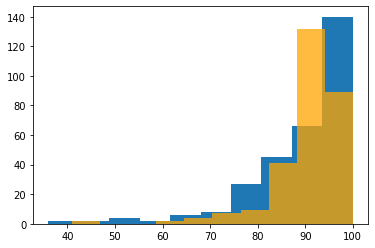

In [168]:
plt.hist(ips_val['taux_brut_de_reussite_serie_l'])
plt.hist(ips_val['taux_reussite_attendu_france_serie_l'], color = 'orange', alpha = 0.75)
plt.plot()

[]

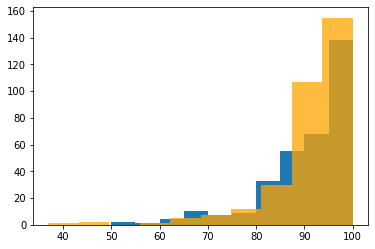

In [169]:
plt.hist(ips_val['taux_brut_de_reussite_serie_es'])
plt.hist(ips_val['taux_reussite_attendu_france_serie_es'], color = 'orange', alpha = 0.75)
plt.plot()

[]

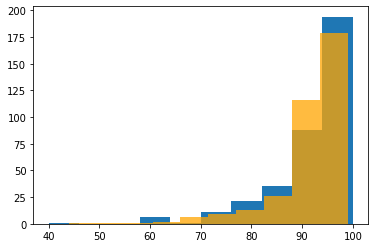

In [170]:
plt.hist(ips_val['taux_brut_de_reussite_serie_s'])
plt.hist(ips_val['taux_reussite_attendu_france_serie_s'], color = 'orange', alpha = 0.75)
plt.plot()

[]

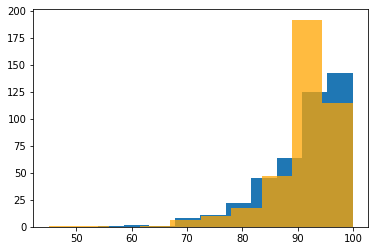

In [171]:
plt.hist(ips_val['taux_brut_de_reussite_total_series'])
plt.hist(ips_val['taux_reussite_attendu_france_total_series'], color = 'orange', alpha = 0.75)
plt.plot()

[]

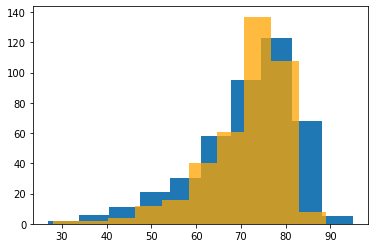

In [172]:
plt.hist(ips_val['taux_acces_brut_seconde_bac'])
plt.hist(ips_val['taux_acces_attendu_france_seconde_bac'], color = 'orange', alpha = 0.75)
plt.plot()

[]

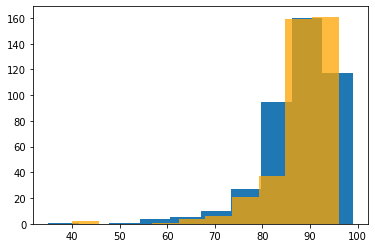

In [173]:
plt.hist(ips_val['taux_acces_brut_premiere_bac'])
plt.hist(ips_val['taux_acces_attendu_france_premiere_bac'], color = 'orange', alpha = 0.75)
plt.plot()

[]

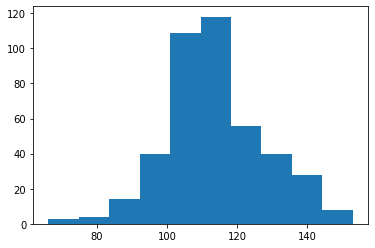

In [174]:
plt.hist(ips_val['ips_voie_gt'])
plt.plot()

OLS :
### Attention : travailler sur les variables corrélées (public/privé etc)

In [175]:
ips_val

taux_brut_de_reussite_serie_l  \
code_etablissement annee                                  
0010006B           2022                             NaN   
0010010F           2015                            89.0   
0010032E           2015                            92.0   
                   2022                             NaN   
0020012C           2022                             NaN   
...                                                 ...   
9730328U           2016                             NaN   
9730371R           2012                            50.0   
9760125G           2012                             NaN   
9760182U           2012                            84.0   
9760316P           2016                            89.0   

                          taux_brut_de_reussite_serie_es  \
code_etablissement annee                                   
0010006B           2022                              NaN   
0010010F           2015                             87.0   
0010032E           2015                             90.0   
                   2022                              NaN   
0020012C           2022                              NaN   
...                                                  ...   
9730328U           2016                              NaN   
9730371R           2012                             74.0   
9760125G           2012                              NaN   
9760182U           2012                             73.0   
9760316P           2016                             70.0   

                          taux_brut_de_reussite_serie_s  \
code_etablissement annee                                  
0010006B           2022                             NaN   
0010010F           2015                            91.0   
0010032E           2015                            95.0   
                   2022                             NaN   
0020012C           2022                             NaN   
...                                                 ...   
9730328U           2016                             NaN   
9730371R           2012                            76.0   
9760125G           2012                             NaN   
9760182U           2012                            62.0   
9760316P           2016                            74.0   

                          taux_brut_de_reussite_total_series  \
code_etablissement annee                                       
0010006B           2022                                 90.0   
0010010F           2015                                 91.0   
0010032E           2015                                 93.0   
                   2022                                 95.0   
0020012C           2022                                 95.0   
...                                                      ...   
9730328U           2016                                 75.0   
9730371R           2012                                 54.0   
9760125G           2012                                 81.0   
9760182U           2012                                 64.0   
9760316P           2016                                 76.0   

                          taux_reussite_attendu_france_serie_l  \
code_etablissement annee                                         
0010006B           2022                                    NaN   
0010010F           2015                                   86.0   
0010032E           2015                                   92.0   
                   2022                                    NaN   
0020012C           2022                                    NaN   
...                                                        ...   
9730328U           2016                                    NaN   
9730371R           2012                                   41.0   
9760125G           2012                                    NaN   
9760182U           2012                                    NaN   
9760316P           2016                                    NaN   

                 

In [176]:
import statsmodels.api as sm

                                    OLS Regression Results                                    
Dep. Variable:     taux_brut_de_reussite_total_series   R-squared:                       0.364
Model:                                            OLS   Adj. R-squared:                  0.361
Method:                                 Least Squares   F-statistic:                     118.5
Date:                                Mon, 11 Dec 2023   Prob (F-statistic):           2.09e-41
Time:                                        09:27:07   Log-Likelihood:                -1332.7
No. Observations:                                 417   AIC:                             2671.
Df Residuals:                                     414   BIC:                             2684.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                                  coef    std err 

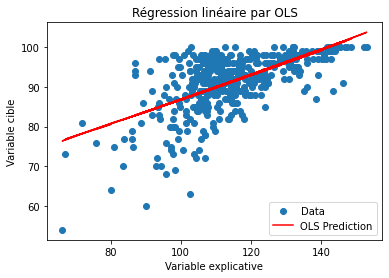

In [198]:
ips_reg = ips_val[['ips_voie_gt', 'ecart_type_de_l_ips_voie_gt', 'taux_brut_de_reussite_total_series']].dropna()
X = ips_reg[['ips_voie_gt', 'ecart_type_de_l_ips_voie_gt']]
y = ips_reg['taux_brut_de_reussite_total_series']

# Ajout d'une colonne de 1 pour le terme constant (biais)
X = sm.add_constant(X)

# Création du modèle OLS
model = sm.OLS(y, X)

# Entraînement du modèle
results = model.fit()

# Affichage des résultats de la régression
print(results.summary())

# Tracer la régression
plt.scatter(X['ips_voie_gt'], y, label='Data')
plt.plot(X['ips_voie_gt'], results.predict(X), color='red', label='OLS Prediction')
plt.xlabel('Variable explicative')
plt.ylabel('Variable cible')
plt.title('Régression linéaire par OLS')
plt.legend()
plt.show()